## Classifying people in outcome level

### From US Census data

- 'Not in universe issue' : how do we treat it ?

In [1]:
import numpy as np
import pandas as pd
import savReaderWriter
import seaborn as sns
sns.set(color_codes=True)
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
%matplotlib inline

In [81]:
import csv
import more_itertools
with open('us_census_full/columns.csv', 'rb') as f:
    reader = csv.reader(f)
    columns = list(more_itertools.flatten(reader))
print columns, len(columns)       

['age', 'class_of_worker', 'detailed_industry_recode', 'detailed_occupation_recode', 'education', 'wage_per_hour', 'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_stat', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'instance_weight', 'migration_code-change_in_msa', 'migration_code-change_in_reg', 'migration_code-move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits', 'weeks

In [87]:
data = pd.read_csv('us_census_full/census_income_learn.csv', header=None, names=columns)

In [88]:
data.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [89]:
data.describe()

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


### Missing values

Ok

In [90]:
data.isnull().sum()

age                                          0
class_of_worker                              0
detailed_industry_recode                     0
detailed_occupation_recode                   0
education                                    0
wage_per_hour                                0
enroll_in_edu_inst_last_wk                   0
marital_stat                                 0
major_industry_code                          0
major_occupation_code                        0
race                                         0
hispanic_origin                              0
sex                                          0
member_of_a_labor_union                      0
reason_for_unemployment                      0
full_or_part_time_employment_stat            0
capital_gains                                0
capital_losses                               0
dividends_from_stocks                        0
tax_filer_stat                               0
region_of_previous_residence                 0
state_of_prev

In [26]:
data.drop(['VETQVA', 'VETYN', 'WKSWORK'], axis = 1, inplace = True, errors = 'ignore')

In [24]:
data['PTOTVAL'].unique()

array([ 0, 52, 30, 49, 32, 15, 38, 48,  9, 24, 50, 10, 45, 43,  4, 26, 40,
       20,  6, 12, 51,  1,  8, 39, 13, 16, 34, 14, 36, 44, 22, 41, 46, 28,
       23, 35, 25, 17, 11, 37,  5, 42, 29,  2, 21, 19, 47,  3, 27,  7, 18,
       33, 31])

### Target variable 

Very imbalanced dataset towards people who earn less than 50k/year

Using `dataframe.describe()` method:
- with the option `include=[np.number]` to compare numerical columns :

Average age for people with higher income is 46, whereas it is 33 years old for people with lower income.

- with the option `include=[np.categorical]` to compare categorical columns : main takeaways :

Hence, as one could have guessed, the top category for `education` is Children among the lower -50k category, and Bachelor degree among the +50k one. This latter category also has a majority of `married` people, while the other is mainly formed of `never married` people. The 50k+ category is mostly male while the 50k- is mostly female, and both are in majority white.
The +50k category works in majority in `Manufacturing - durable goods`, with the `Executive admin and managerial` status. 

In [101]:
data.describe()

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [98]:
data['target'].value_counts()

 - 50000.    187141
 50000+.      12382
Name: target, dtype: int64

In [107]:
data[data['target']==' 50000+.'].describe(include=[np.number])

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000,12382.000000
mean,46.266193,29.132450,12.060330,81.640284,4830.930060,193.139557,1553.448070,1796.256279,4.003715,0.262559,1.981344,48.069617,94.528428
std,11.830906,15.262802,12.055461,431.364773,16887.627002,607.542507,6998.071762,962.502889,2.118183,0.637988,0.135313,12.259412,0.499211
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.820000,0.000000,0.000000,1.000000,0.000000,94.000000
25%,38.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1122.600000,2.000000,0.000000,2.000000,52.000000,94.000000
50%,45.000000,33.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1684.100000,4.000000,0.000000,2.000000,52.000000,95.000000
75%,53.000000,42.000000,17.000000,0.000000,0.000000,0.000000,363.000000,2240.880000,6.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,3683.000000,99999.000000,8432.830000,6.000000,2.000000,2.000000,52.000000,95.000000


In [109]:
data[data['target']==' - 50000.'].describe(include=[np.object])

,class_of_worker,education,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,...,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,fill_inc_questionnaire_for_veterans_admin,target
count,187141,187141,187141,187141,187141,187141,187141,187141,187141,187141,...,187141,187141,187141,187141,187141,187141,187141,187141,187141,187141
unique,9,17,3,7,24,15,5,10,2,3,...,10,3,4,5,43,43,43,5,3,1
top,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
freq,99341,47422,174591,85368,99778,99778,156093,160140,101321,170311,...,93153,94669,93153,131852,148861,150091,165840,165843,185388,187141


In [110]:
data[data['target']==' 50000+.'].describe(include=[np.object])

,class_of_worker,education,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,...,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,fill_inc_questionnaire_for_veterans_admin,target
count,12382,12382,12382,12382,12382,12382,12382,12382,12382,12382,...,12382,12382,12382,12382,12382,12382,12382,12382,12382,12382
unique,9,16,3,7,24,15,5,10,2,3,...,9,3,4,2,42,42,42,5,3,1
top,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,50000+.
freq,7322,3915,12352,9600,1494,3593,11272,11767,9719,10148,...,6543,6543,6543,12380,10302,10388,11149,11149,12151,12382


### Age

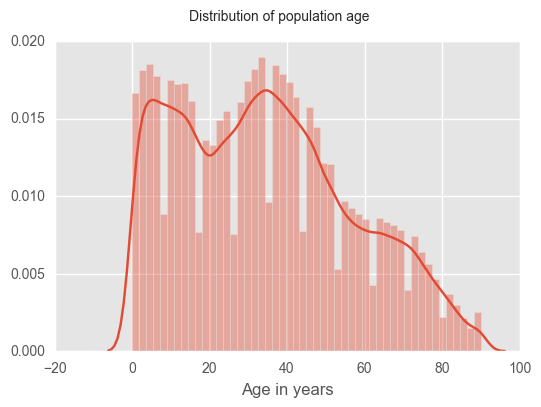

In [43]:
x = data[['AAGE']].dropna(axis=0).astype(str).astype(int)
sns_plot = sns.distplot(x, kde=True, axlabel='Age in years');
fig = sns_plot.get_figure()
fig.suptitle('Distribution of population age')
#fig.savefig('plots-water/dist_rwanda2010_HV204.png') 

### Distribution of PTOTVAL Total person income

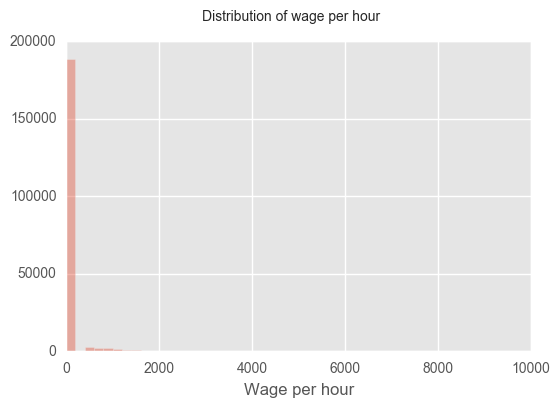

In [93]:
x = data[['wage_per_hour']].dropna(axis=0).astype(str).astype(int)
sns_plot = sns.distplot(x, kde=False, axlabel='Wage per hour');
fig = sns_plot.get_figure()
fig.suptitle('Distribution of wage per hour')
#fig.savefig('plots-water/dist_rwanda2010_HV204.png') 

### Repartition of class of worker ACLSWKR

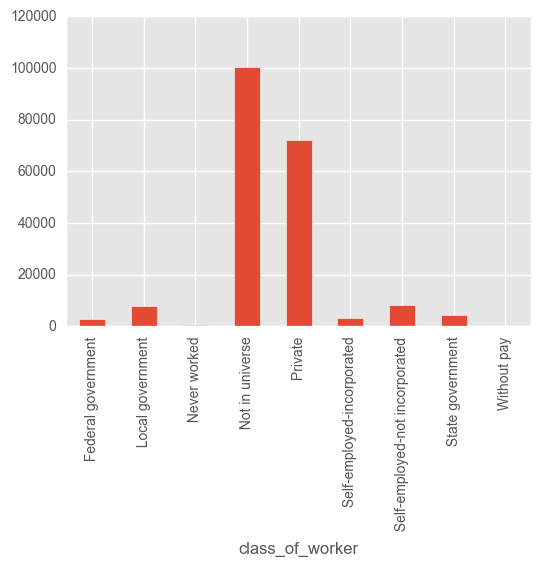

In [95]:
data.groupby(['class_of_worker'])['age'].count().plot(kind='bar')

### Repartition of major industry code AMJIND

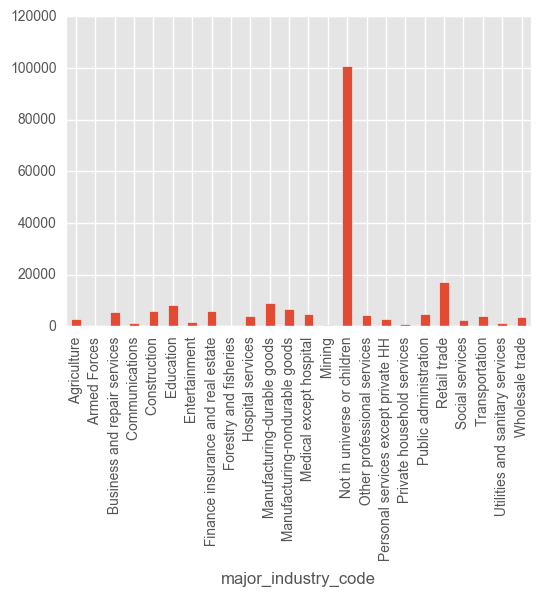

In [96]:
data.groupby(['major_industry_code'])['age'].count().plot(kind='bar')

### Repartition of education AGI

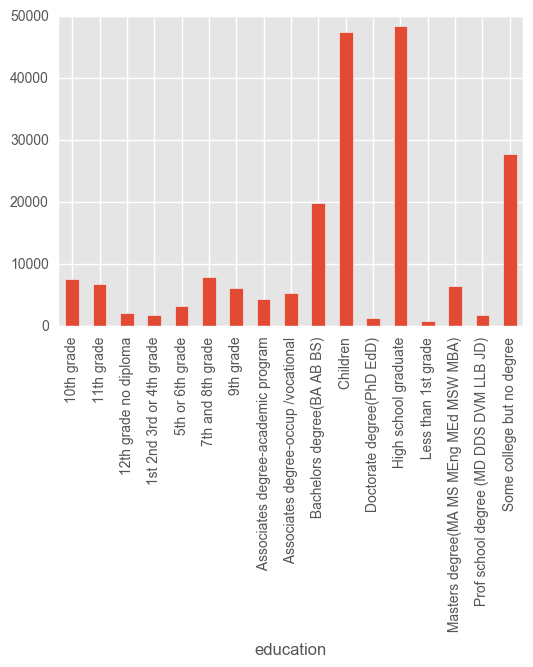

In [97]:
#data.groupby(['AHGA'])['AAGE'].count().plot(kind='bar')
data.groupby(['education'])['age'].count().plot(kind='bar')

### Bivariate visualizations

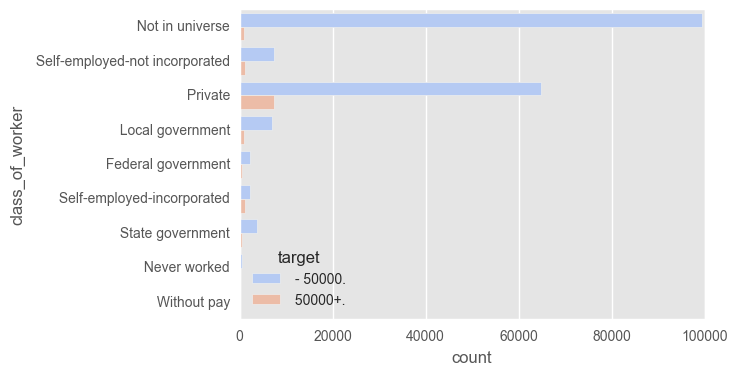

In [112]:
sns.countplot(y="class_of_worker", hue="target", data=data, palette="coolwarm");

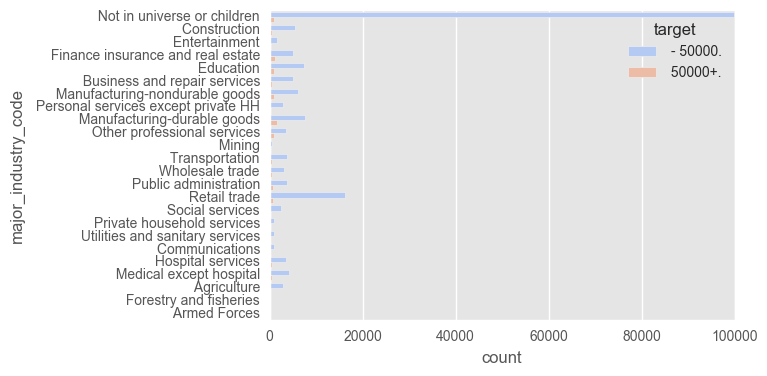

In [113]:
sns.countplot(y="major_industry_code", hue="target", data=data, palette="coolwarm");

Some industries, mainly from the tertiary sector, seem to retain more 50k+ people, such as Finance, insurance and real estate, Education, Manufacturing.
Others on the contrary, such as Agriculture, Mining, Entertainment, do not count 50k+ people.  

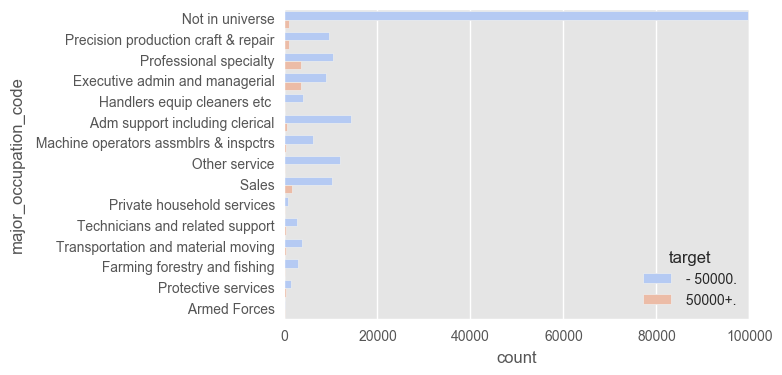

In [115]:
sns.countplot(y="major_occupation_code", hue="target", data=data, palette="coolwarm");

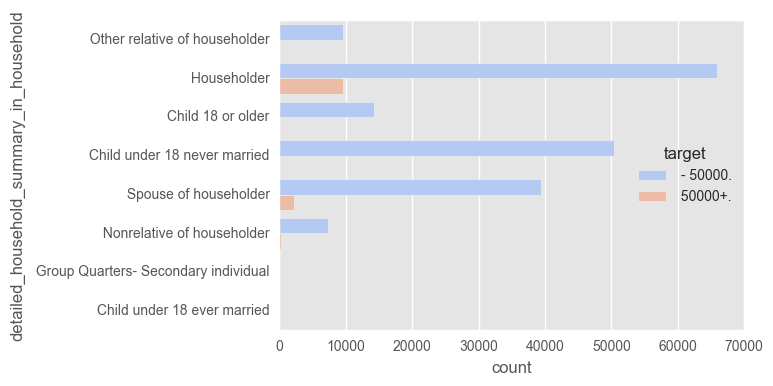

In [124]:
sns.countplot(y="detailed_household_summary_in_household", hue="target", data=data, palette="coolwarm");

Clearly, the `detailed_household_summary_in_household` seems a good criterion for classifying the population : the 50k+ category are either in majority householders, or spouses of householders.

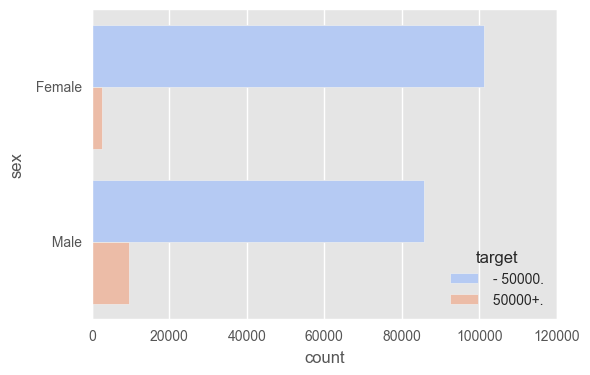

In [131]:
sns.countplot(y="sex", hue="target", data=data, palette="coolwarm");

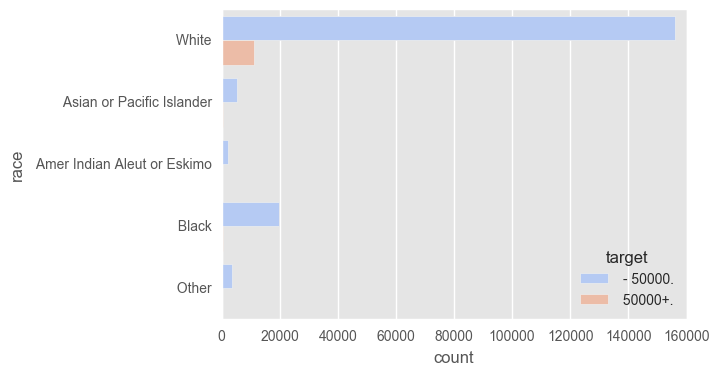

In [128]:
sns.countplot(y="race", hue="target", data=data, palette="coolwarm");

It seems like the 50k+ category is in vast majority white. (sorry for the controversial inference!)

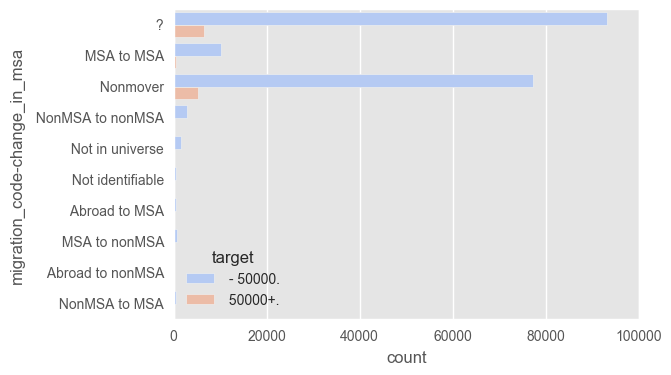

In [125]:
sns.countplot(y="migration_code-change_in_msa", hue="target", data=data, palette="coolwarm");

Not a strong pattern from the migration variables

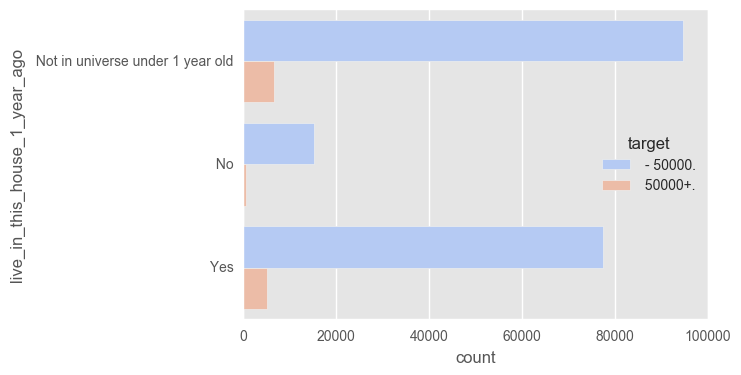

In [126]:
sns.countplot(y="live_in_this_house_1_year_ago", hue="target", data=data, palette="coolwarm");

### Correlation matrix for numerical variables 

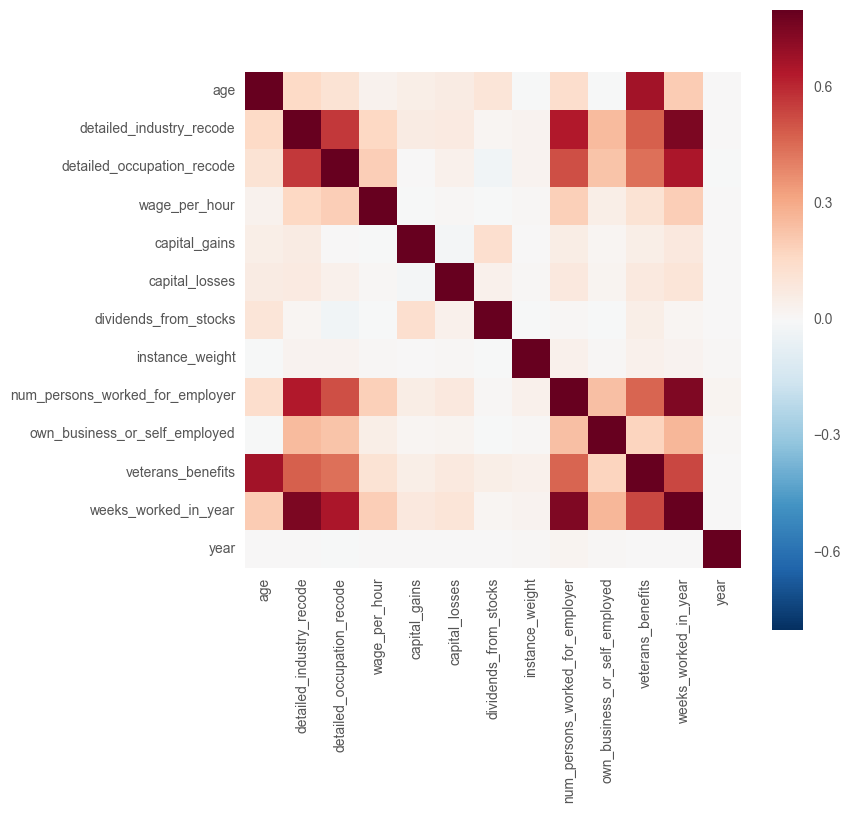

In [119]:
# Load the datset of correlations between cortical brain networks
corrmat = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

## Feature engineering

Which features to keep :

- age                                          0
- class_of_worker                              0
- detailed_industry_recode                     DROP (keep major_industry_code instead)
- detailed_occupation_recode                   DROP (same as for industry)
- education                                    0
- wage_per_hour                                0
- enroll_in_edu_inst_last_wk                   0
- marital_stat                                 0
- major_industry_code                          0
- major_occupation_code                        0
- race                                         0
- hispanic_origin                              0
- sex                                          0
- member_of_a_labor_union                      0
- reason_for_unemployment                      0
- full_or_part_time_employment_stat            0
- capital_gains                                0
- capital_losses                               0
- dividends_from_stocks                        0
- tax_filer_stat                               0
- region_of_previous_residence                 0
- state_of_previous_residence                  0
- detailed_household_and_family_stat           0
- detailed_household_summary_in_household      0
- instance_weight                              0
- migration_code-change_in_msa                 DROP
- migration_code-change_in_reg                 DROP
- migration_code-move_within_reg               DROP
- live_in_this_house_1_year_ago                0
- migration_prev_res_in_sunbelt                DROP
- num_persons_worked_for_employer              0
- family_members_under_18                      0
- country_of_birth_father                      DROP
- country_of_birth_mother                      DROP
- country_of_birth_self                        0
- citizenship                                  0
- own_business_or_self_employed                0
- fill_inc_questionnaire_for_veterans_admin    0
- veterans_benefits                            0
- weeks_worked_in_year                         0
- year                                         DROP

In [122]:
data.iloc[:,20:30].head()

,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code-change_in_msa,migration_code-change_in_reg,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt
0,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?
1,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes
2,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?
3,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe
4,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe


In [132]:
clean_data = data.drop(['detailed_industry_recode', 'detailed_occupation_recode', 
                        'migration_code-change_in_msa', 'migration_code-change_in_reg',
                       'migration_code-move_within_reg', 'migration_prev_res_in_sunbelt',
                       'country_of_birth_father', 'country_of_birth_mother', 'year '], 
                       axis = 1, inplace = False, errors = 'ignore')

In [133]:
len(clean_data.columns)

34

In [135]:
cat_data = clean_data.select_dtypes(include=[np.object])

In [136]:
cat_data.columns.tolist()

['class_of_worker',
 'education',
 'enroll_in_edu_inst_last_wk',
 'marital_stat',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_a_labor_union',
 'reason_for_unemployment',
 'full_or_part_time_employment_stat',
 'tax_filer_stat',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'live_in_this_house_1_year_ago',
 'family_members_under_18',
 'country_of_birth_self',
 'citizenship',
 'fill_inc_questionnaire_for_veterans_admin',
 'target']

In [167]:
subset_cat_data = cat_data[['class_of_worker', 'education', 'target']]
subset_cat_data_dummies = pd.get_dummies(subset_cat_data)

In [168]:
len(subset_cat_data_dummies.columns)

28

In [169]:
subset_cat_data.columns.tolist()

['class_of_worker', 'education', 'target']

In [175]:
coocc = subset_cat_data_dummies.T.dot(subset_cat_data_dummies)

In [176]:
coocc.shape

(28, 28)

In [193]:
from plot_cooc_matrix import heatmap

In [191]:
for label_number, label_header in enumerate(label_headers):
    print label_header

class_of_worker_ Federal government
class_of_worker_ Local government
class_of_worker_ Never worked
class_of_worker_ Not in universe
class_of_worker_ Private
class_of_worker_ Self-employed-incorporated
class_of_worker_ Self-employed-not incorporated
class_of_worker_ State government
class_of_worker_ Without pay
education_ 10th grade
education_ 11th grade
education_ 12th grade no diploma
education_ 1st 2nd 3rd or 4th grade
education_ 5th or 6th grade
education_ 7th and 8th grade
education_ 9th grade
education_ Associates degree-academic program
education_ Associates degree-occup /vocational
education_ Bachelors degree(BA AB BS)
education_ Children
education_ Doctorate degree(PhD EdD)
education_ High school graduate
education_ Less than 1st grade
education_ Masters degree(MA MS MEng MEd MSW MBA)
education_ Prof school degree (MD DDS DVM LLB JD)
education_ Some college but no degree
target_ - 50000.
target_ 50000+.


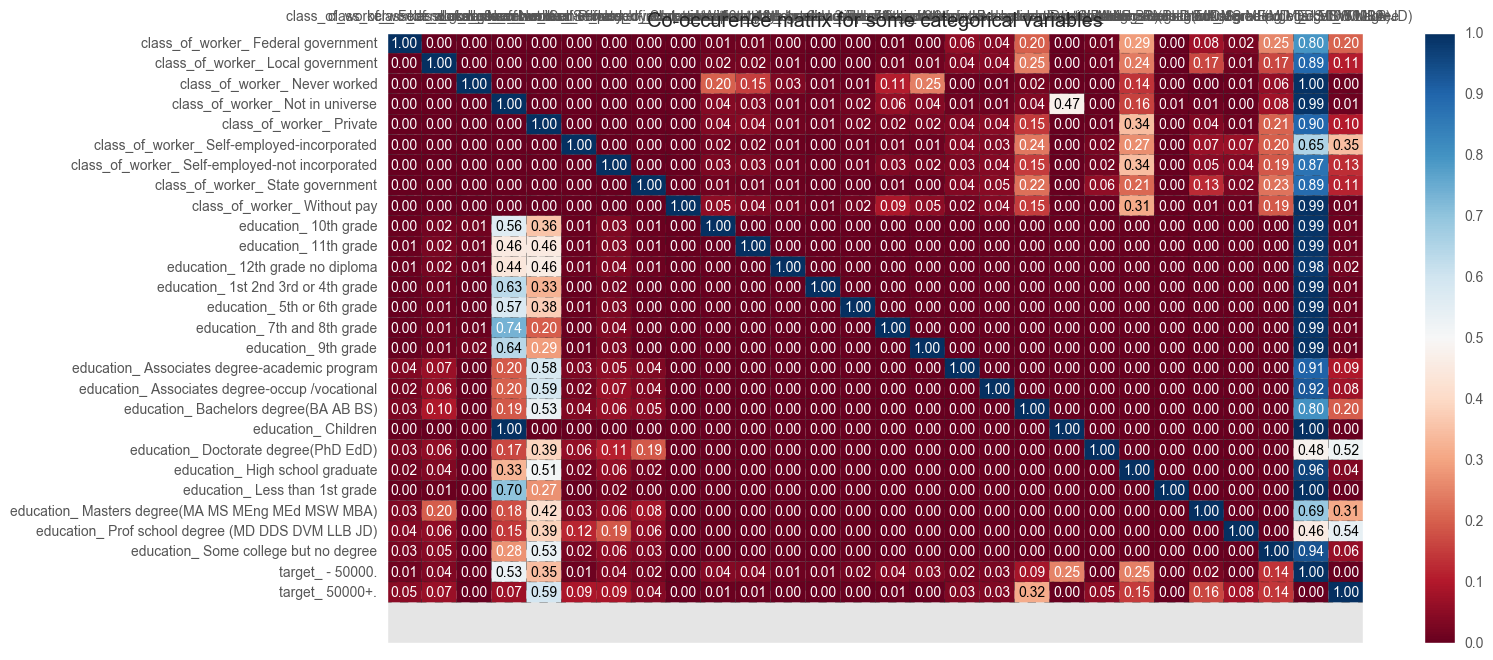

In [194]:
cooc_diagonal = np.diagonal(coocc)
with np.errstate(divide='ignore', invalid='ignore'):
        cooc_percentage = np.nan_to_num(np.true_divide(coocc, cooc_diagonal[:, None]))
        
label_headers = subset_cat_data_dummies.columns.tolist()
"""
label_header_with_count = [ '{0} ({1})'.format(label_header, cooc_diagonal[label_number]) 
                            for label_number, label_header in enumerate(label_headers)]
"""


title = 'Co-occurence matrix for some categorical variables'
x_axis_size = cooc_percentage.shape[0]
y_axis_size = cooc_percentage.shape[1]
xlabel = ''
ylabel = ''
xticklabels = label_headers
yticklabels = label_headers
heatmap(cooc_percentage, title, xlabel, ylabel, xticklabels, yticklabels)